# Content
* Importing Libraries and Data
* Data Cleaning
* Data Wrangling and Exploration
* Machine Learning

## 1 Importing Libraries and Data

In [42]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import os
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#importing data
df=pd.read_csv(r'C:\Users\Samth\CareerFoundry Projects\Achievement 6\1 Data\Manipulated Data\userapi_clean.csv')

In [3]:
#notebook view
%matplotlib inline

## 2 Data Cleaning

In [4]:
#viewing set
df.head(10)

,Unnamed: 0,gender,genderLooking,age,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,lang_en,lang_de,lang_it,lang_es,lang_pt,verified,shareProfileEnabled,lastOnlineDate,lastOnlineTime,userId
0,0,F,M,25,1.00,4,8279,239,0,3,...,False,True,False,False,False,0,1,2015-04-25T20:43:26Z,1.429995e+09,55303fc3160ba0eb728b4575
1,1,F,M,22,0.85,5,663,13,0,0,...,False,True,True,False,False,0,1,2015-04-26T09:19:35Z,1.430040e+09,552e7b61c66da10d1e8b4c82
2,2,F,M,21,0.00,4,1369,88,0,2,...,False,False,False,False,False,0,1,2015-04-06T14:24:07Z,1.428330e+09,54a584ecc56da128638b4674
3,3,F,none,20,0.12,3,22187,1015,2,3,...,True,False,False,False,False,0,1,2015-04-07T11:21:01Z,1.428406e+09,54c92738076ea1b5338b4735
4,4,F,M,21,0.15,12,35262,1413,9,12,...,False,True,False,False,False,0,1,2015-04-06T14:25:20Z,1.428330e+09,54e1a6f6c76da135748b4a3a
5,5,F,M,24,0.81,18,7339,180,0,2,...,True,True,False,False,False,0,1,2015-04-08T14:37:51Z,1.428504e+09,54f2b4ce0b6ea1177e8b4d18
6,6,F,none,24,0.65,13,18672,492,0,1,...,True,True,False,False,False,0,1,2015-04-27T19:29:58Z,1.430163e+09,54ecbb39170ba08b488b4aa5
7,7,F,M,23,0.81,6,19091,1348,0,20,...,True,True,False,False,False,0,0,2015-04-08T14:18:11Z,1.428503e+09,54fc1786170ba041758b4577
8,8,F,M,20,0.88,14,29984,2389,10,11,...,True,True,False,False,False,0,1,2015-04-07T20:01:55Z,1.428437e+09,550c8310066ea13f808b4b35
9,9,F,M,24,0.81,1,5979,147,1,2,...,True,True,False,False,False,0,1,2015-04-06T16:10:49Z,1.428337e+09,53745af3150ba023158b4588


In [5]:
#viewing all columns
df.columns

Index(['Unnamed: 0', 'gender', 'genderLooking', 'age', 'counts_details',
       'counts_pictures', 'counts_profileVisits', 'counts_kisses',
       'counts_fans', 'counts_g', 'flirtInterests_chat',
       'flirtInterests_friends', 'flirtInterests_date', 'country', 'city',
       'location', 'distance', 'isFlirtstar', 'isHighlighted', 'isInfluencer',
       'isMobile', 'isNew', 'isOnline', 'isVip', 'lang_count', 'lang_fr',
       'lang_en', 'lang_de', 'lang_it', 'lang_es', 'lang_pt', 'verified',
       'shareProfileEnabled', 'lastOnlineDate', 'lastOnlineTime', 'userId'],
      dtype='object')

In [21]:
#removing unneeded columns
df2=df.drop(columns=['Unnamed: 0','counts_details','shareProfileEnabled','counts_g'])

In [22]:
#renaming certain columns to be intuitive
df2.rename(columns={'gender':'Gender','genderLooking':'Seeking','age':'Age','counts_pictures':'Pictures','counts_profileVisits':'Profile Visits','counts_kisses':'Kisses','counts_fans':'Fans','country':'Country','city':'City','location':'Location','verified':'Verified','userId':'User ID'},inplace=True)

In [16]:
#checking for missing values
df2.isnull().sum()

Gender                    0
Seeking                   0
Age                       0
Pictures                  0
Profile Visits            0
Kisses                    0
Fans                      0
flirtInterests_chat       0
flirtInterests_friends    0
flirtInterests_date       0
Country                   0
City                      0
Location                  0
distance                  0
isFlirtstar               0
isHighlighted             0
isInfluencer              0
isMobile                  0
isNew                     0
isOnline                  0
isVip                     0
lang_count                0
lang_fr                   0
lang_en                   0
lang_de                   0
lang_it                   0
lang_es                   0
lang_pt                   0
Verified                  0
lastOnlineDate            0
lastOnlineTime            0
User ID                   0
dtype: int64

#### No missing values, celebration time come on!

In [9]:
#checking for duplicate values
dups=df2.duplicated()

In [10]:
#viewing dupe dataframe
dups.shape

(3572,)

#### No duplicate values found! More celebrating!

In [23]:
#saving a version of this clean dataset
df2.to_csv(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\Achievement 6\1 Data\Manipulated Data\userapi_manipulated_titles.csv'))

# 3 Data Wrangling and Exploration

### In this section of the notebook I will be creating various scatterplots to understand different variables and their possible relationships in the data frame. I will ideally explort the relationship between pictures and profile visits, kisses and pictures, kisses and fans, and create a new variable 'Under 25' and compare this against Kisses and Profile Visits

In [24]:
#viewing columns
df2.columns

Index(['Gender', 'Seeking', 'Age', 'Pictures', 'Profile Visits', 'Kisses',
       'Fans', 'flirtInterests_chat', 'flirtInterests_friends',
       'flirtInterests_date', 'Country', 'City', 'Location', 'distance',
       'isFlirtstar', 'isHighlighted', 'isInfluencer', 'isMobile', 'isNew',
       'isOnline', 'isVip', 'lang_count', 'lang_fr', 'lang_en', 'lang_de',
       'lang_it', 'lang_es', 'lang_pt', 'Verified', 'lastOnlineDate',
       'lastOnlineTime', 'User ID'],
      dtype='object')

In [25]:
#creating new variable
df2.loc[df2['Age'] >= 25, 'Under 25']= '0'

In [26]:
df2.loc[df2['Age'] < 25, 'Under 25']= '1'

In [27]:
df2['Under 25'].value_counts(dropna=False)

Under 25
1    3146
0     426
Name: count, dtype: int64

In [28]:
#saving dataset with new variable column
df2.to_csv(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\Achievement 6\1 Data\Manipulated Data\userapi_wrangledw_titles.csv'))

#### This new columns where 0 is False and 1 is True, shows us that 3146 users are under 25 years old, where as only 426 users are 25 and older, this means that our app has a larger demographic of younger woman than older woman

### 3a Creating our various visualizations

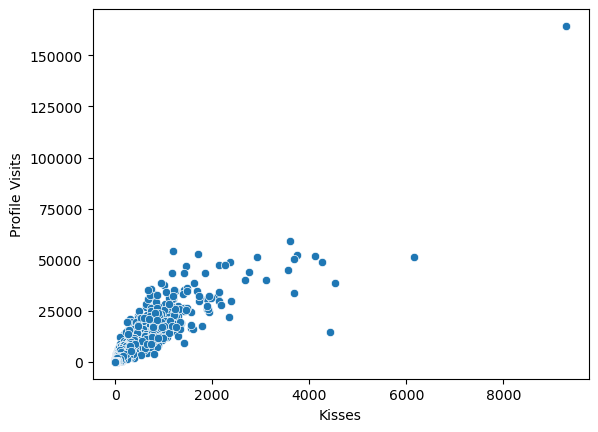

In [46]:
#scatterplot between pictures and profile visits
picpro=sns.scatterplot(x='Kisses',y='Profile Visits',data=df2)

This scatterplot shows that the amount of pictures a user has on their profile has a strong positive diagonal correlation, and there is a pattern between the amount of photos and kisses

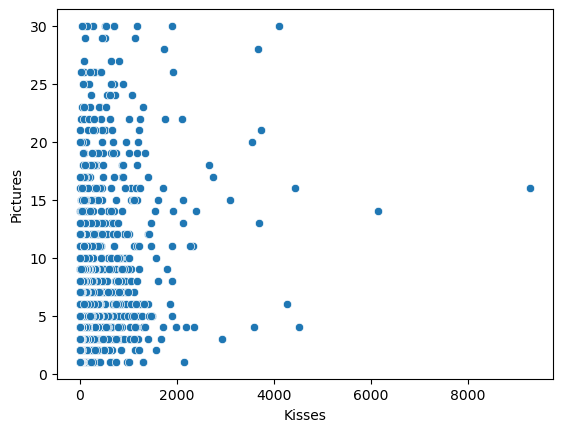

In [51]:
#visual for kisses and pictures
kispic=sns.scatterplot(x='Kisses',y='Pictures',data=df2)

This scatterplot shows that there is no correlation between how many pictures and kisses a user will receive

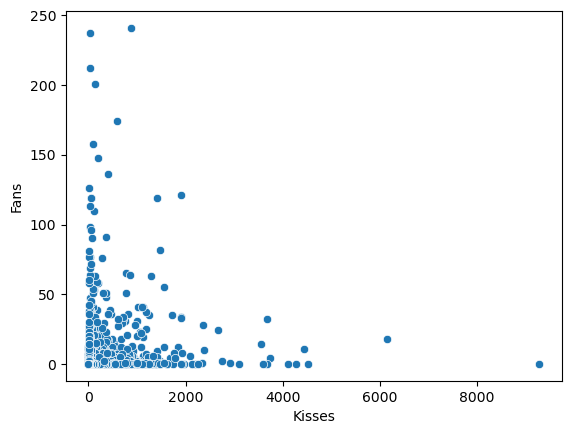

In [50]:
#visual for kisses and fans 
kisfan=sns.scatterplot(x='Kisses',y='Fans',data=df2)

This scatterplot shows that there is no direct correlation between kisses and fans, as some users have few kisses but many fans(followers) and vice versa

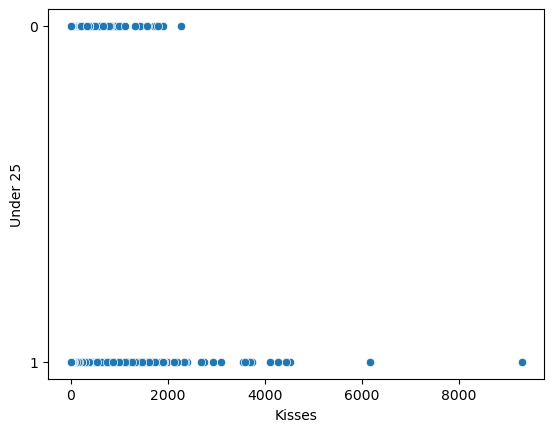

In [59]:
#visuals for kisses and under 25
kisage=sns.scatterplot(x='Kisses',y='Under 25',data=df2)

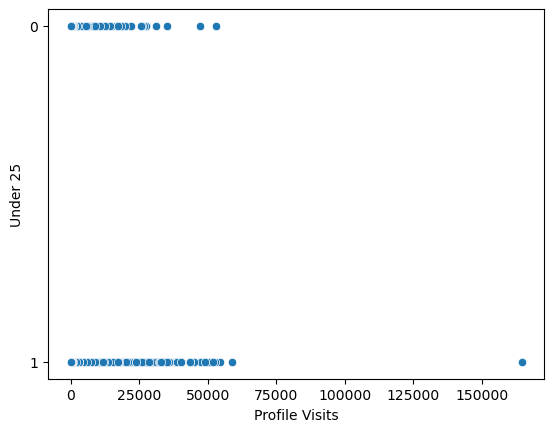

In [60]:
#visual for profile visits and under 25
proage=sns.scatterplot(x='Profile Visits',y='Under 25',data=df2)

On both ends of the age spectrum, it's clear that due to the higher proportion of younger woman, younger woman are more likely to have more profile visits and more likes than older woman

#### We now are able to answer one of our hypothesis questions "Do younger woman receive more like or profile visits than older woman?" The answer is yes, but this is not an accurate representation as younger woman make up a majority of the user database

# 4 Machine Learning and Regression

In [62]:
#reshaping variables Kisses and Profile Visits
X = df2['Profile Visits'].values.reshape(-1,1)
y = df2['Kisses'].values.reshape(-1,1)

In [63]:
#viewing independent variable
X

array([[8279],
       [ 663],
       [1369],
       ...,
       [  31],
       [   3],
       [  54]], dtype=int64)

In [64]:
#viewing dependent variable
y

array([[239],
       [ 13],
       [ 88],
       ...,
       [  0],
       [  0],
       [  0]], dtype=int64)

In [65]:
#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [66]:
#creating regression object
regression= LinearRegression()

In [67]:
#fitting regression to training set size 60%
regression.fit(X_train,y_train)

LinearRegression()

In [68]:
#predicting dependent values
yprediction=regression.predict(X_test)

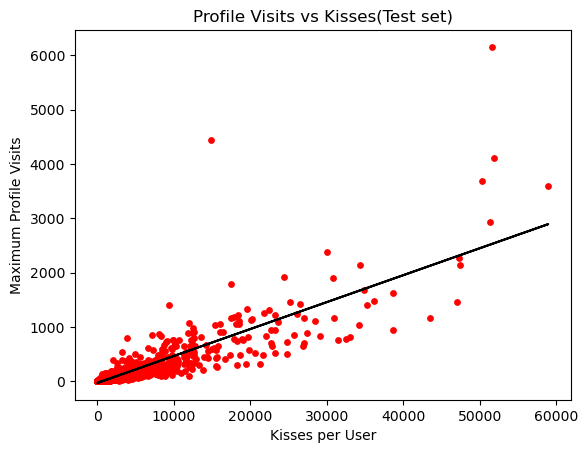

In [71]:
#creating plot
testplot = plt
testplot.scatter(X_test, y_test, color='red', s = 15)
testplot.plot(X_test, yprediction, color='black', linewidth =1.5)
testplot.title('Profile Visits vs Kisses(Test set)')
testplot.xlabel('Kisses per User')
testplot.ylabel('Maximum Profile Visits')
testplot.show()

The line fits the data generally well, the data is clusted towards the base and there are outlier values for users who have kisses over 30,000. The line is a positive linear line

In [72]:
#identify model summary statistics
meansquare=mean_squared_error(y_test,yprediction)
r2=r2_score(y_test,yprediction)

In [73]:
#print summary
print('Slope:' ,regression.coef_)
print('Mean squared error: ', meansquare)
print('R2 score: ', r2)

Slope: [[0.04957491]]
Mean squared error:  41271.489317470194
R2 score:  0.7166027940385484


Our R2 score value shows us that there is a high significance that our regression model can explain the variance in the Profile Visits users receive

In [74]:
#view y 
print(yprediction)

[[ 90.25340467]
 [-24.71081796]
 [ 64.82147444]
 ...
 [  5.77775337]
 [-27.78446255]
 [-13.90348698]]


In [75]:
#dataframe for prediction values
predictdf = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': yprediction.flatten()})

In [77]:
predictdf.head()

,Actual,Predicted
0,49,90.253405
1,4,-24.710818
2,97,64.821474
3,189,351.810644
4,36,-1.113159


This shows that our test set does not fit, it does not accurately predict the actual values

#### testing on the training set

In [80]:
#creating prediction for training set
ytrainprediction=regression.predict(X_train)

In [83]:
meansquaretrain= mean_squared_error(y_train,ytrainprediction)
r2= r2_score(y_train,ytrainprediction)

In [84]:
#view and printing values
print('Slope:' ,regression.coef_)
print('Mean squared error: ', meansquaretrain)
print('R2 score: ', r2)

Slope: [[0.04957491]]
Mean squared error:  28225.635455845957
R2 score:  0.8237025156287496


Our R coefficient is high which is still a good sign

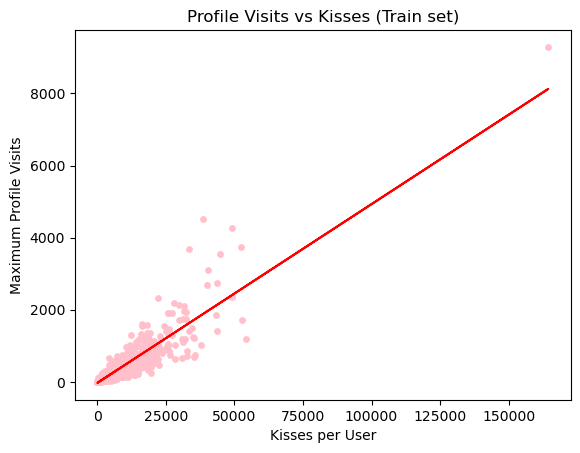

In [87]:
# Visualizing the training set results.

trainplot = plt
trainplot.scatter(X_train, y_train, color='pink', s = 15)
trainplot.plot(X_train, ytrainprediction, color='red', linewidth =1.5)
trainplot.title('Profile Visits vs Kisses (Train set)')
trainplot.xlabel('Kisses per User')
trainplot.ylabel('Maximum Profile Visits')
trainplot.show()

The graph still demonstrates a strong linear relationship between profile visits and kisses

In [88]:
#dataframe for train values
traindf = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': ytrainprediction.flatten()})

In [92]:
#viewing values
traindf.head()

,Actual,Predicted
0,90,315.026059
1,0,-20.695250
2,12,-18.910553
3,19,7.959050
4,41,65.961697


Our predictions and the actual values are still very far off from each other..

# 5 Exporting all visuals

In [96]:
#saving visuals
picpro.figure.savefig(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\Achievement 6\3 Visualizations\'Picture_Profile_Scatter.png'))

In [97]:
kispic.figure.savefig(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\Achievement 6\3 Visualizations\'Kisses_Pictures_Scatter.png'))

In [98]:
kisfan.figure.savefig(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\Achievement 6\3 Visualizations\'Kisses_Fans_Scatter.png'))

In [99]:
kisage.figure.savefig(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\Achievement 6\3 Visualizations\'Kisses_Age_Scatter.png'))

In [100]:
proage.figure.savefig(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\Achievement 6\3 Visualizations\'Profile_Age_Scatter.png'))

In [101]:
testplot.figure.savefig(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\Achievement 6\3 Visualizations\'Kisses_Profile_Testplot.png'))

AttributeError: 'function' object has no attribute 'savefig'

In [102]:
trainplot.figure.savefig(os.path.join(r'C:\Users\Samth\CareerFoundry Projects\Achievement 6\3 Visualizations\'Kisses_Profile_Trainplot.png'))

AttributeError: 'function' object has no attribute 'savefig'

For some reason I am unable to save the visualizations from the testing and training sets..